1. VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỂM ẢNH

1.1 Biến đổi cường độ ảnh (Image inverse tranformantion)

[[136 136 137 ... 122 122 123]
 [136 135 136 ... 116 125 126]
 [134 133 137 ... 122 128 123]
 ...
 [168 170 169 ... 177 174 174]
 [167 159 158 ... 171 172 177]
 [166 165 162 ... 176 174 174]]


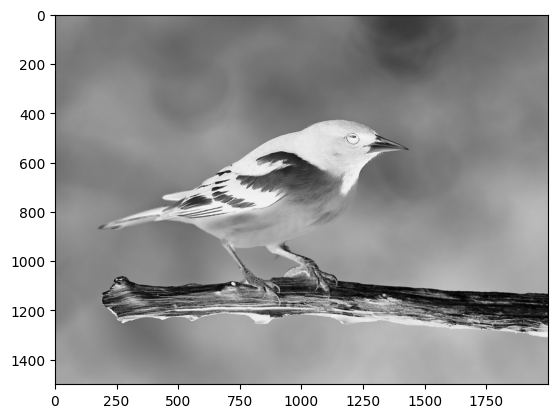

In [1]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# mở ảnh đen trắng
img = Image.open('bird.png').convert('L')
# đảo ảnh dạng 'L' sang mảng 1 số (matrix)
im_1 = np.asarray(img)
# thực hiện thuật toán tử nghịch đảo
im_2 = 255 - im_1
# chuyên ảnh từ 2 ảnh tử mảng số thành ảng trở lại
print(im_2)
new_img = Image.fromarray(im_2)
img.show()
plt.imshow(new_img, cmap = 'gray')
plt.show()


1.2 Thay đổi chất lượng ảnh với Power law(Gamma-Correction)

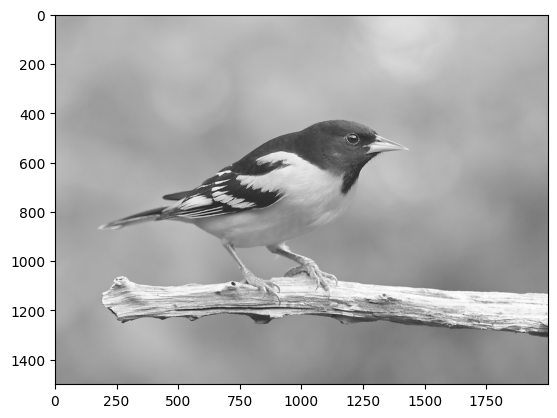

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
# Mở ảnh đen trắng
img = Image.open('bird.png').convert('L')
# Đảo ảnh dạng "L" sang 1 mảng số
im_1 = np.asarray(img)
# Gamma ban đầu
gamma = 0.5
# Chuyển matrix từ số nguyên sang số thực
b1 = im_1.astype(float)
# Tìm giá trị lớn nhất trong B1
b2 = np.max(b1)
# Chuẩn hóa B1 (tức là chuyển các giá trị b1 về khoảng [0,1])
b3 = (b1+1) / b2
# Tính tương quan hàm mũ gamma (logarit nhân gamma)
b4 = np.log(b3) * gamma
# Tính tương quan hàm mũ gamma và quy về khoảng [0,255]
c = np.exp(b4) * 255.0
# Chuyển c về số nguyên
c1 = c.astype(np.uint8)
d = Image.fromarray(c1)
img.show()
new_img.show()
plt.imshow(d, cmap='gray')
plt.show()


1.3 Thay đổi cường độ điểm ảnh với log tranformation


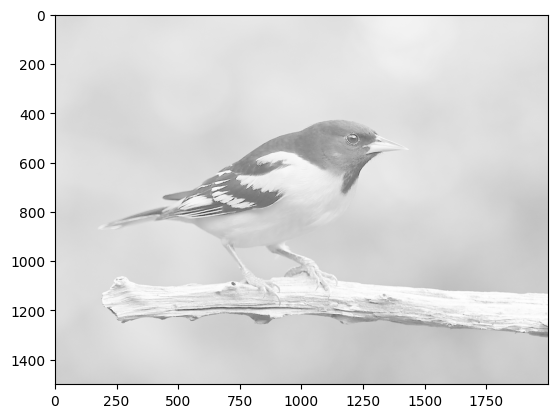

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở ảnh đen trắng
img = Image.open('bird.png').convert('L')
# Đảo ảnh dạng "L" sang 1 mảng số
im_1 = np.asarray(img)
# Gamma ban đầu
gamma = 0.5
# Chuyển matrix từ số nguyên sang số thực
b1 = im_1.astype(float)
# Tìm giá trị lớn nhất trong B1
b2 = np.max(b1)
# biến đổi log
c = (128.0*np.log(1+b1)) / np.log(1+b2) 
# Chuyển c về số nguyên
c1 = c.astype(np.uint8)
d = Image.fromarray(c1)
img.show()
new_img.show()
plt.imshow(d, cmap='gray')
plt.show()


1.4 Histogram equalization


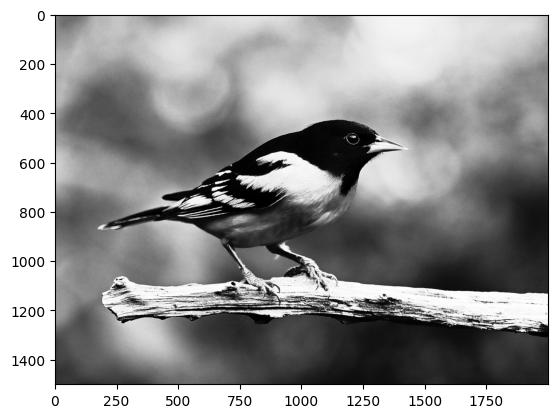

In [5]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('bird.png').convert('L')

# convert image i into an ndarray
im1 = np.asarray(img)

# convert 2D ndarray from 1D array
b1 = im1.flatten()

# histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])

# cumulative distribution function is computed
cdf = hist.cumsum()

# places where cdf=0 is masked or ignored and rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

# histogram equalization is performed
num_cdf = (cdf_m - cdf_m.min()) * 255
den_cdf = (cdf_m.max() - cdf_m.min())
cdf = num_cdf / den_cdf

# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf, 0).astype('uint8')

# new values are assigned in the flattened array
im2 = cdf[b1]

# this is 1D so we use reshape command to make it into 2D
im3 = np.reshape(im2, im1.shape)

# converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4, cmap="gray")
plt.show()


1.5 Thay đổi ảnh với Contrast Stretching


0 255


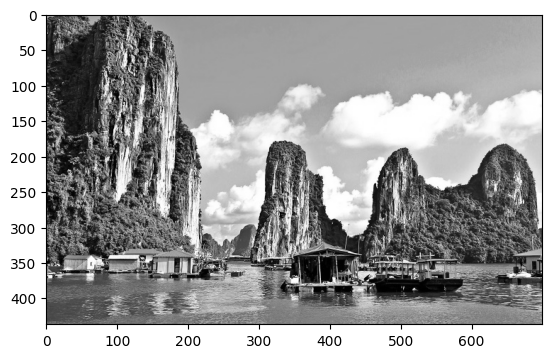

In [8]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# open a grayscale image
img = Image.open('exercise/ha-long-bay-in-vietnam.jpg').convert('L')
# convert image into an ndarray
im1 = np.asarray(img)
# finding the maximum and minimum pixel values
b = im1.max()
a = im1.min()
print(a, b)
# converting im1 to float
c = im1.astype(float)
# contrast stretching transformation
im2 = 255 * (c - a) / (b - a)
# im2 is converted from ndarray to image
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3)
plt.show()


1.6 Biến đổi Fourier 1.6.1. Biến đổi ảnh với Fast Fourier

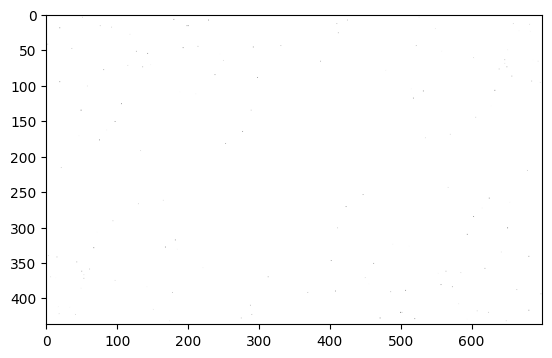

In [10]:

from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('exercise/ha-long-bay-in-vietnam.jpg').convert('L')

# convert image into an ndarray
im1 = np.array(img)

# performing FFT
c = abs(scipy.fftpack.fft2(im1))

# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
d = d.astype(float)

# im2 is converted from ndarray to image
im3 = Image.fromarray(d)

img.show()
im3.show()
plt.imshow(im3, cmap="gray")
plt.show()

1.6.2 Lọc ảnh trong miền tần xuất

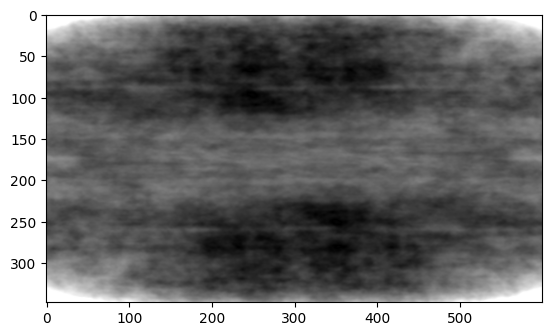

In [11]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# open a grayscale image
img = Image.open('exercise/pagoda.jpg').convert('L')
# convert image into an ndarray
im1 = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H = np.ones((M, N))
center1 = M / 2
center2 = N / 2
r0 = 30.0  # cut-off radius
t = 1      # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t
# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        # Euclidean distance from origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to eliminate high frequency
        if r > 0:
            H[i, j] = 1 / (1 + (r / r0)**t2)
# H is converted from ndarray to image
H1 = H.astype(float)
H = Image.fromarray(H1)
# performing the convolution
con = d * H1
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
# im3 is converted from ndarray to image
im3 = Image.fromarray(e)
img.show()
H.show()
plt.imshow(im3)
plt.show()


Butterworth highpass Filter

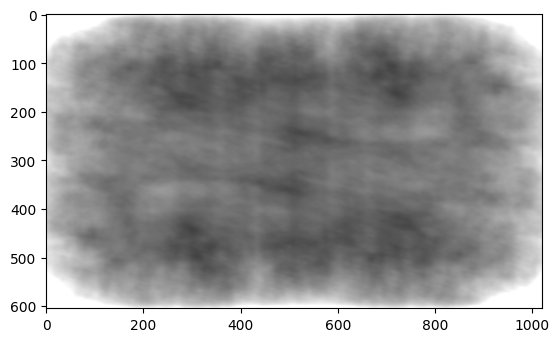

In [12]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# open a grayscale image
img = Image.open('exercise/quang_ninh.jpg').convert('L')
# convert image into an ndarray
im1 = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(im1))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]
# H is defined and values in H are initialized to 1
H = np.ones((M, N))
center1 = M / 2
center2 = N / 2
r0 = 30.0   # cut-off radius
t1 = 1      # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1
# defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        # euclidean distance from origin is computed
        r = math.sqrt(r1)
        # using cut-off radius to eliminate high frequency
        if r > 0:
            H[i, j] = 1 / (1 + (r / r0)**t2)
# H is converted from ndarray to image
H1 = H.astype(float)
H = Image.fromarray(H1)
# performing the convolution
con = d * H1
# computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
# im3 is converted from ndarray to image
im3 = Image.fromarray(e)
img.show()
H.show()
plt.imshow(im3)
plt.show()

2. BÀI TẬP


1. Vết chương trình để menu cho phép người dùng chọn các phương pháp biến đổi ảnh nhur sau:
- Image inverse transformation
- Gamma-Correction
- Log-Transformation
- Histogram equalization
- Contrast Stretching
- Khi nhập đúng vào phim I, G, L, H, C thì chương trình sẽ thực hiện hàm tương ứng cho các bài này. Lưu ý khi thực hiện các bài tập, các bạn cần làm bài đúng.

I: Image Inverse
G: Gamma Correction
L: Log Transformation
H: Histogram Equalization
C: Contrast Stretching


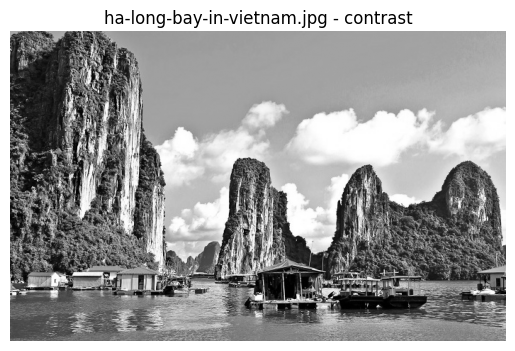

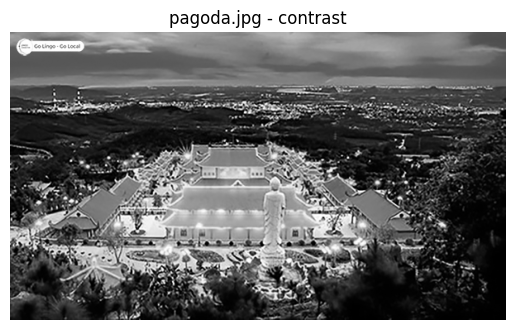

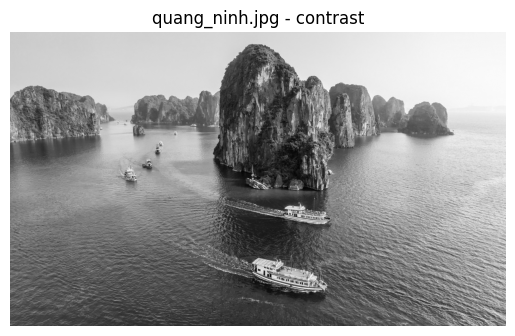

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def img_inv_func(img):
    return Image.fromarray(255 - np.asarray(img))

def gamma_corr_func(img, gamma=0.5):
    a = np.asarray(img).astype(float)
    m = np.max(a)
    a = (a + 1) / m
    a = np.exp(np.log(a) * gamma) * 255
    return Image.fromarray(a.astype(np.uint8))

def log_transform_func(img):
    a = np.asarray(img).astype(float)
    m = np.max(a)
    a = (128 * np.log(1 + a)) / np.log(1 + m)
    return Image.fromarray(a.astype(np.uint8))

def hist_eq_func(img):
    a = np.asarray(img)
    flat = a.flatten()
    hist, _ = np.histogram(a, 256, [0, 255])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf, 0).astype('uint8')
    eq = cdf[flat].reshape(a.shape)
    return Image.fromarray(eq)

def contrast_stretch_func(img):
    a = np.asarray(img).astype(float)
    stretched = 255 * (a - a.min()) / (a.max() - a.min())
    return Image.fromarray(stretched.astype(np.uint8))

def apply_transformation(func, folder, save_folder, suffix):
    for file in os.listdir(folder):
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            path = os.path.join(folder, file)
            img = Image.open(path).convert('L')
            out = func(img)
            plt.imshow(out, cmap='gray')
            plt.title(f"{file} - {suffix}")
            plt.axis('off')
            plt.show()
            name = os.path.splitext(file)[0] + f"_{suffix}.png"
            out.save(os.path.join(save_folder, name))

os.makedirs("result", exist_ok=True)

transform_map = {
    'I': (img_inv_func, 'inverse'),
    'G': (gamma_corr_func, 'gamma'),
    'L': (log_transform_func, 'log'),
    'H': (hist_eq_func, 'hist'),
    'C': (contrast_stretch_func, 'contrast')
}

print("I: Image Inverse")
print("G: Gamma Correction")
print("L: Log Transformation")
print("H: Histogram Equalization")
print("C: Contrast Stretching")

choice = input("Nhập lựa chọn (I, G, L, H, C): ").upper()

if choice in transform_map:
    func, name = transform_map[choice]
    apply_transformation(func, "exercise", "result", name)
else:
    print("Lựa chọn không hợp lệ.")